<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #ff4c4c; max-width: 1000px; font-family: Arial, sans-serif; line-height: 1.6;">
<h2 style="text-align: center; color: #333366;">YOLOv8 Instance Segmentation on Brain Tumar Dataset.</h2>
</div>

In [7]:
import os
os.environ['NO_ALBUMENTATIONS_UPDATE'] = '1'

Dataset link: https://universe.roboflow.com/iotseecs/brain-tumor-yzzav/dataset/1

In [28]:
#!pip install ultralytics

In [29]:
#!pip install roboflow

In [30]:
#!pip install -U albumentations

In [11]:
!nvidia-smi

Sun Jan 12 10:51:05 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   33C    P0             27W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [12]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [13]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="mKLo8Jlj6hy8KqEpN3qg")
project = rf.workspace("iotseecs").project("brain-tumor-yzzav")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [15]:
# Load model
model = YOLO('yolov8n-seg.pt')

# Train the model
train_results = model.train(
    data="/kaggle/working/BRAIN-TUMOR-1/data.yaml",  # path to dataset YAML
    epochs=10,  # number of training epochs
    imgsz=640,  # training image size
    device=0,  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
)

100%|██████████| 6.74M/6.74M [00:00<00:00, 211MB/s]

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/kaggle/working/BRAIN-TUMOR-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

YOLOv8n-seg summary: 261 layers, 3,263,811 parameters, 3,263,795 gradients, 12.1 GFLOPs

Transferred 381/417 items from pretrained weights
TensorBoard: Start with 'tensorboard --logdir runs/segment/train2', view at http://localhost:6006/
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅


train: Scanning /kaggle/working/BRAIN-TUMOR-1/train/labels.cache... 583 images, 2 backgrounds, 0 corrupt: 100%|██████████| 583/583 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



Argument 'quality_lower' is not valid and will be ignored.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /kaggle/working/BRAIN-TUMOR-1/valid/labels.cache... 123 images, 1 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<?, ?it/s]


Plotting labels to runs/segment/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/train2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument 'quality_lower' is not valid and will be ignored.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10      3.44G      1.175      2.948      2.816      1.384          7        640: 100%|██████████| 37/37 [00:10<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]

                   all        123        126          1      0.128      0.718      0.492          1      0.128      0.683      0.381



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.93G      1.026      1.753      1.806      1.217          7        640: 100%|██████████| 37/37 [00:09<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all        123        126       0.72      0.614        0.7      0.434       0.73      0.623      0.695      0.428



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10       2.9G       1.11      1.801      1.682      1.282          7        640: 100%|██████████| 37/37 [00:09<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.26it/s]

                   all        123        126      0.751      0.717      0.788      0.525      0.755      0.746      0.805       0.48



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10       2.9G      1.077      1.717       1.35      1.203          7        640: 100%|██████████| 37/37 [00:09<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all        123        126      0.602      0.381      0.478      0.249      0.611      0.413      0.488      0.266



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.93G       1.01      1.598      1.207      1.191          7        640: 100%|██████████| 37/37 [00:09<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.30it/s]

                   all        123        126        0.9      0.714       0.87      0.608        0.9      0.714      0.876        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.92G     0.9311       1.51      1.019      1.135          8        640: 100%|██████████| 37/37 [00:09<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.16it/s]

                   all        123        126      0.879      0.927      0.957      0.702      0.879      0.927      0.957        0.7



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.92G     0.9058      1.423     0.8944      1.138          8        640: 100%|██████████| 37/37 [00:09<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.27it/s]

                   all        123        126      0.933      0.952      0.983      0.736      0.933      0.952      0.986      0.735



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10       2.9G     0.8762      1.397     0.8327      1.111          7        640: 100%|██████████| 37/37 [00:09<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.36it/s]

                   all        123        126      0.948       0.96      0.985      0.743      0.948       0.96      0.985      0.732



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.93G     0.8288      1.304     0.7281      1.073          8        640: 100%|██████████| 37/37 [00:09<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.36it/s]

                   all        123        126      0.992      0.975      0.985      0.731      0.992      0.975      0.985      0.752



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.92G     0.8002      1.238     0.7035      1.044          7        640: 100%|██████████| 37/37 [00:09<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.41it/s]

                   all        123        126      0.976      0.984      0.988      0.764      0.976      0.984      0.988      0.755



10 epochs completed in 0.038 hours.
Optimizer stripped from runs/segment/train2/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train2/weights/best.pt, 6.8MB

Validating runs/segment/train2/weights/best.pt...
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,258,259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.38it/s]


                   all        123        126      0.976      0.984      0.989      0.764      0.976      0.984      0.989      0.755
Speed: 0.2ms preprocess, 3.2ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/segment/train2


## Inference

In [17]:
from IPython.display import Image

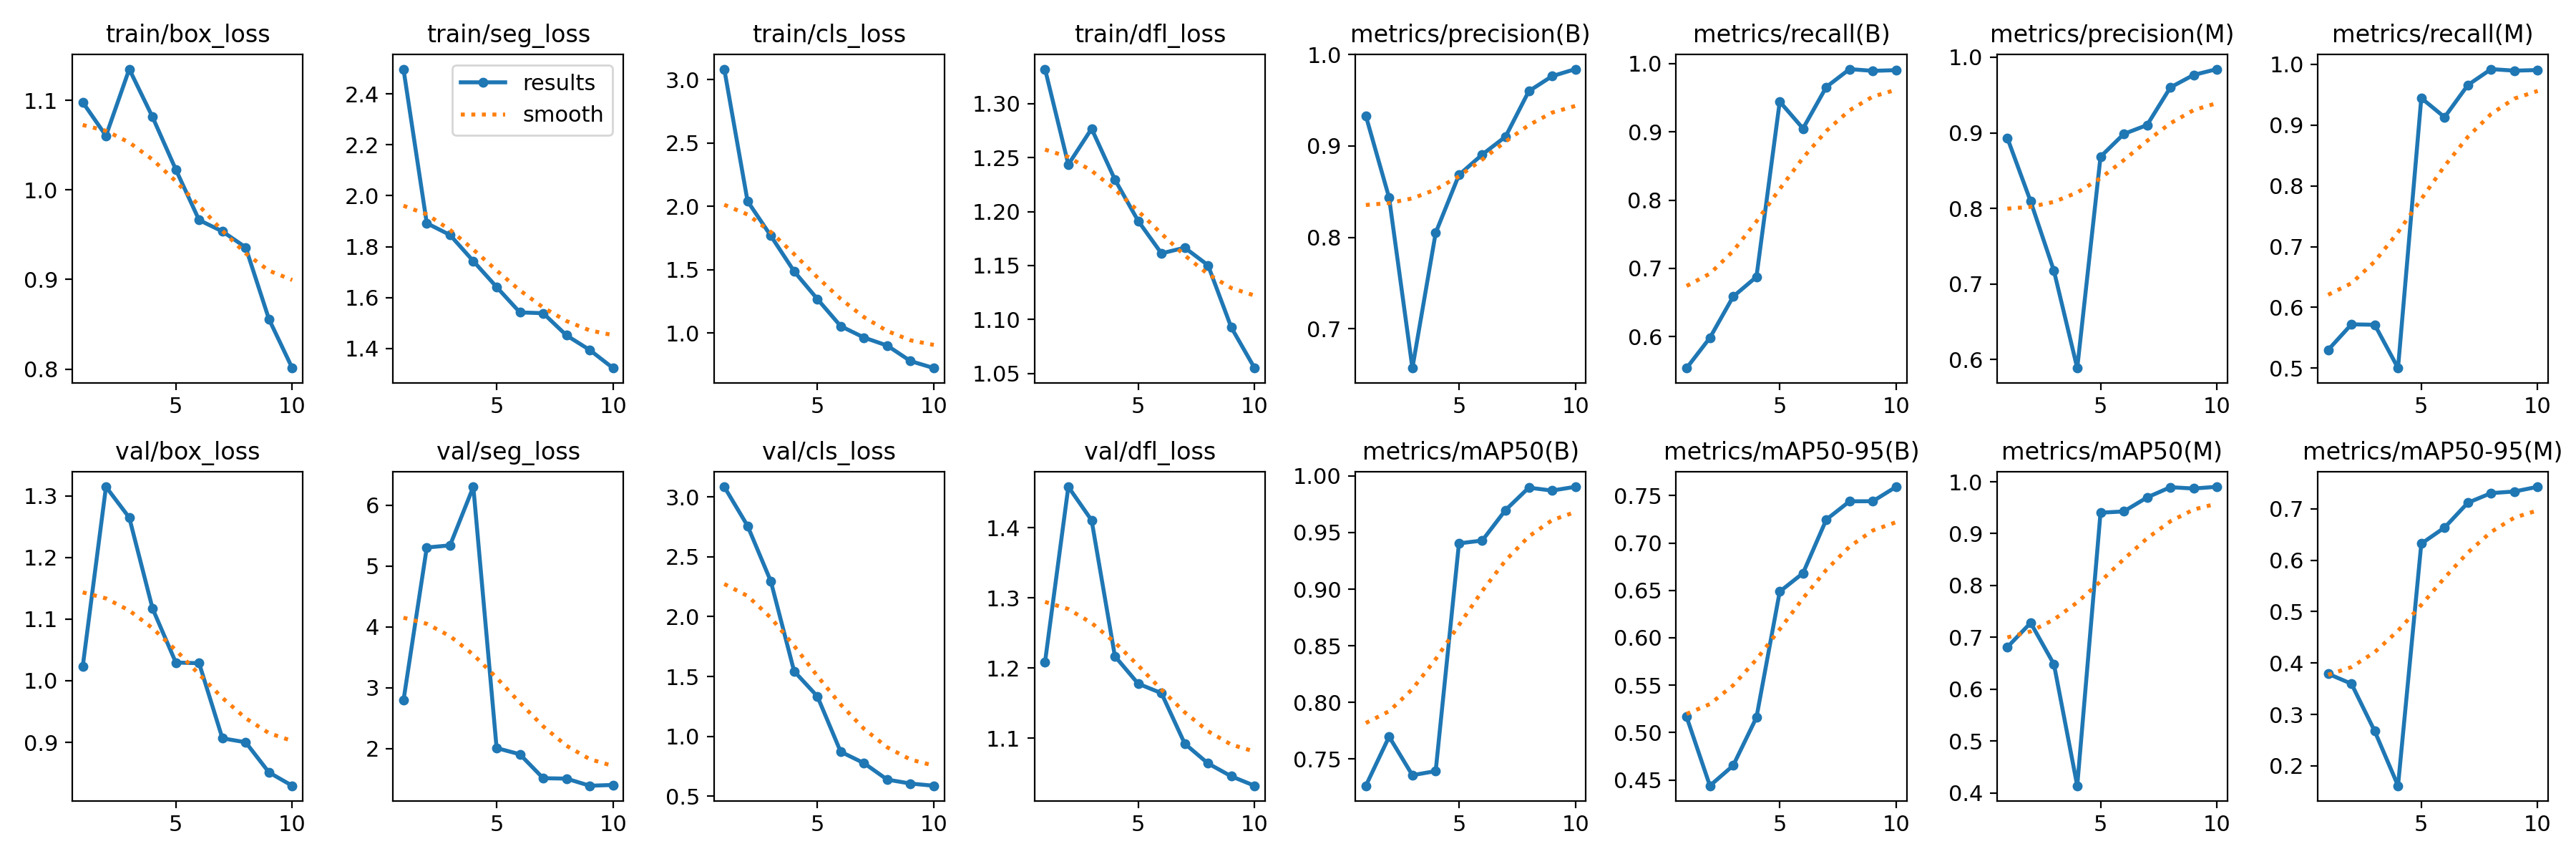

In [27]:
Image("/kaggle/working/runs/segment/train/results.png", width=1100, height=900)


image 1/1 /kaggle/working/BRAIN-TUMOR-1/train/images/y160_jpg.rf.3a793b392b3b88ec7fde2cda57711c17.jpg: 640x640 1 tumor, 13.3ms
Speed: 2.3ms preprocess, 13.3ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict


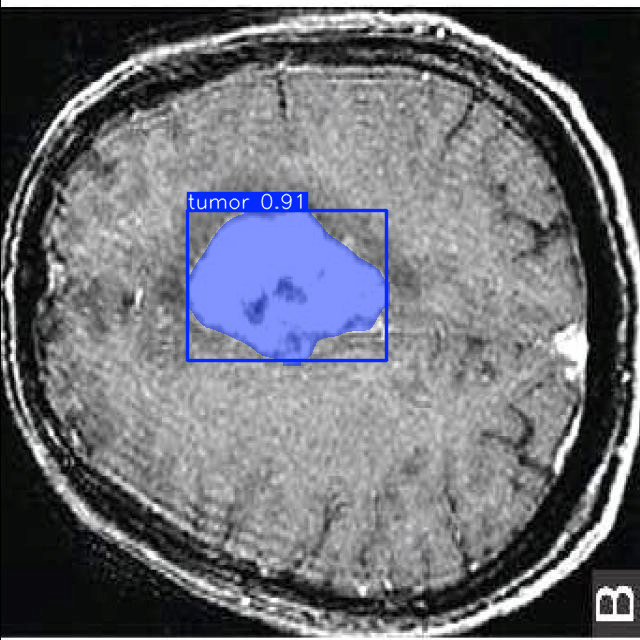

In [22]:
model = YOLO('/kaggle/working/runs/segment/train/weights/best.pt')
results = model("/kaggle/working/BRAIN-TUMOR-1/train/images/y160_jpg.rf.3a793b392b3b88ec7fde2cda57711c17.jpg", save=True)
results[0].show()


image 1/1 /kaggle/working/BRAIN-TUMOR-1/test/images/y196_jpg.rf.cb679791b2f16798391d0a24d51aca4c.jpg: 640x640 1 tumor, 10.9ms
Speed: 1.7ms preprocess, 10.9ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


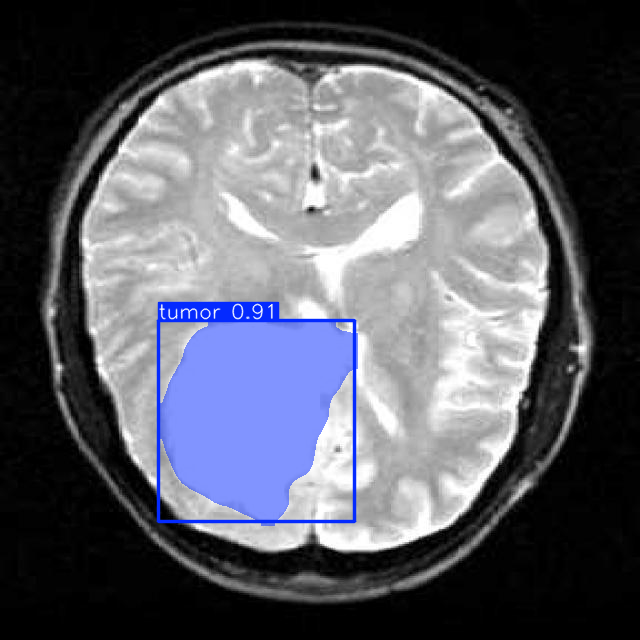

In [23]:
model = YOLO('/kaggle/working/runs/segment/train/weights/best.pt')
results = model("/kaggle/working/BRAIN-TUMOR-1/test/images/y196_jpg.rf.cb679791b2f16798391d0a24d51aca4c.jpg", save=True)
results[0].show()


image 1/1 /kaggle/working/BRAIN-TUMOR-1/test/images/y211_jpg.rf.5618bdef34e0601650594f5158677445.jpg: 640x640 2 tumors, 9.1ms
Speed: 1.6ms preprocess, 9.1ms inference, 16.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict3


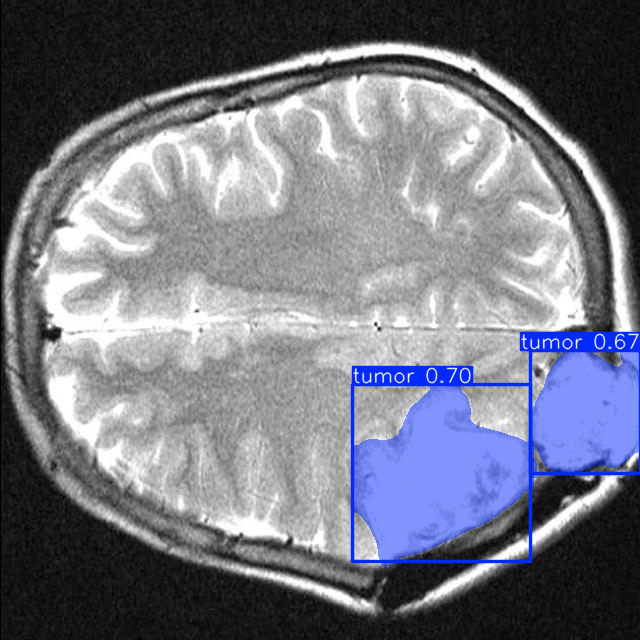

In [24]:
model = YOLO('/kaggle/working/runs/segment/train/weights/best.pt')
results = model("/kaggle/working/BRAIN-TUMOR-1/test/images/y211_jpg.rf.5618bdef34e0601650594f5158677445.jpg", save=True)
results[0].show()


image 1/1 /kaggle/working/BRAIN-TUMOR-1/test/images/y220_jpg.rf.684cb074b0e09de8fef68a8dd70091af.jpg: 640x640 1 tumor, 9.3ms
Speed: 1.6ms preprocess, 9.3ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict4


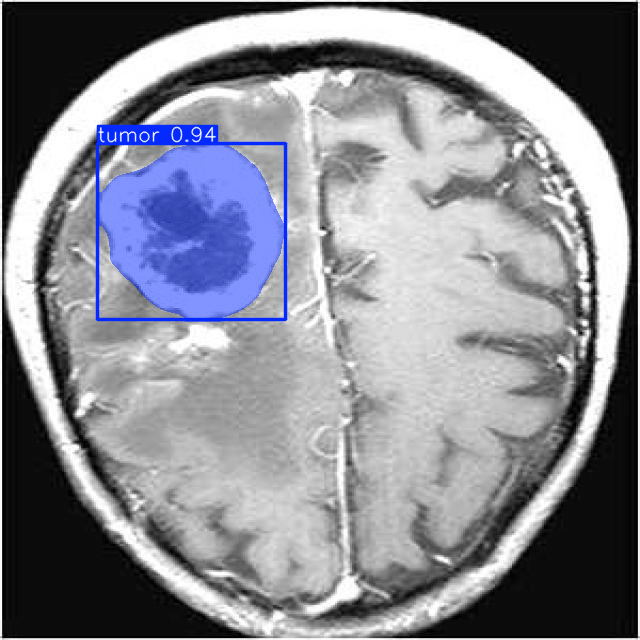

In [25]:
model = YOLO('/kaggle/working/runs/segment/train/weights/best.pt')
results = model("/kaggle/working/BRAIN-TUMOR-1/test/images/y220_jpg.rf.684cb074b0e09de8fef68a8dd70091af.jpg", save=True)
results[0].show()


image 1/1 /kaggle/working/BRAIN-TUMOR-1/test/images/y223_jpg.rf.44024f50537bf35346784d297c0f5db0.jpg: 640x640 1 tumor, 9.0ms
Speed: 1.5ms preprocess, 9.0ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict5


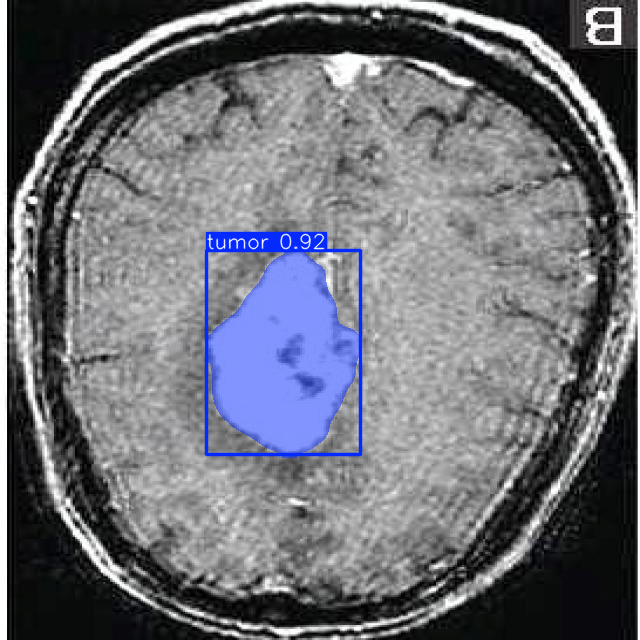

In [26]:
model = YOLO('/kaggle/working/runs/segment/train/weights/best.pt')
results = model("/kaggle/working/BRAIN-TUMOR-1/test/images/y223_jpg.rf.44024f50537bf35346784d297c0f5db0.jpg", save=True)
results[0].show()